In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
data = pd.read_csv("Datasets/3_adult.csv")

In [46]:
data.shape

(48842, 15)

In [47]:
print("Number of rows is",data.shape[0])
print("Number of columns is",data.shape[1])

Number of rows is 48842
Number of columns is 15


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [49]:
data1 = data.sample(frac=0.5,random_state=100)

In [50]:
data.isnull().sum(axis=0)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

<AxesSubplot:>

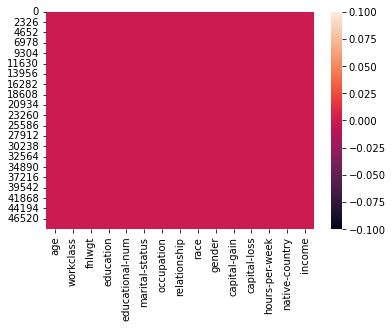

In [51]:
sns.heatmap(data.isnull())

In [52]:
data.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [53]:
data['workclass']=data['workclass'].replace('?',np.nan)
data['occupation']=data['occupation'].replace('?',np.nan)
data['native-country']=data['native-country'].replace('?',np.nan)

In [54]:
data.isin(['?']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [55]:
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

<AxesSubplot:>

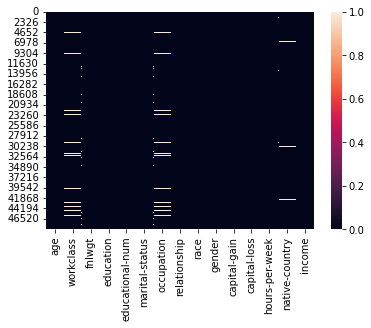

In [56]:
sns.heatmap(data.isnull())

In [57]:
perc_missing = data.isnull().sum()*100/len(data)
print(perc_missing)

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64


In [58]:
data.dropna(how='any',inplace=True)

In [59]:
data.shape

(45222, 15)

In [60]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [64]:
data.drop(['educational-num','capital-gain','capital-loss'],axis=1,inplace=True)

In [65]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

In [67]:
data['age'].describe()

count    45222.000000
mean        38.547941
std         13.217870
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

<AxesSubplot:>

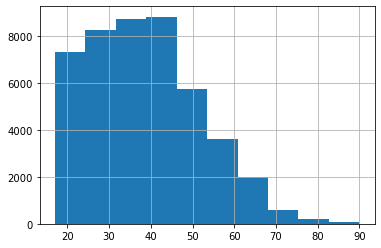

In [68]:
data['age'].hist()

In [74]:
sum(data['age'].between(17,48))

34902

<AxesSubplot:>

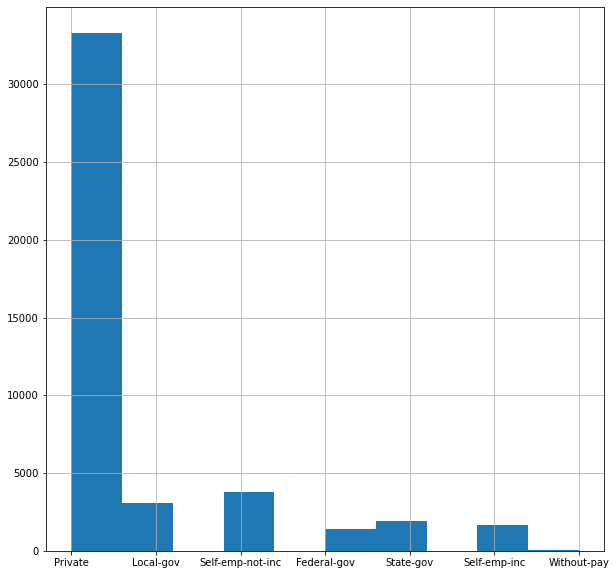

In [80]:
plt.figure(figsize=(10,10))
data['workclass'].hist()

In [82]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

In [91]:
sum(data['education'].isin(['Bachelors','Masters']))

10084

<AxesSubplot:xlabel='income', ylabel='age'>

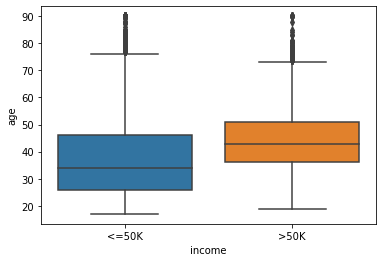

In [99]:
sns.boxplot(x='income',y='age',data=data)

In [103]:
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [104]:
data['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

c:\Users\Dell\AppData\Local\Programs\PythonCodingPack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income', ylabel='count'>

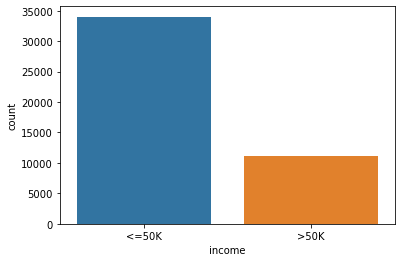

In [105]:
sns.countplot('income',data=data)